Epoch 1/10
1250/1250 [==============================] - 57s 44ms/step - loss: 1.5704 - accuracy: 0.4237 - val_loss: 1.2924 - val_accuracy: 0.5324
Epoch 2/10
1250/1250 [==============================] - 53s 42ms/step - loss: 1.1822 - accuracy: 0.5795 - val_loss: 1.2006 - val_accuracy: 0.5726
Epoch 3/10
1250/1250 [==============================] - 55s 44ms/step - loss: 1.0235 - accuracy: 0.6387 - val_loss: 1.0515 - val_accuracy: 0.6244
Epoch 4/10
1250/1250 [==============================] - 51s 40ms/step - loss: 0.9188 - accuracy: 0.6735 - val_loss: 0.9978 - val_accuracy: 0.6520
Epoch 5/10
1250/1250 [==============================] - 54s 43ms/step - loss: 0.8465 - accuracy: 0.7027 - val_loss: 0.9092 - val_accuracy: 0.6891
Epoch 6/10
1250/1250 [==============================] - 56s 45ms/step - loss: 0.7907 - accuracy: 0.7214 - val_loss: 0.8608 - val_accuracy: 0.7008
Epoch 7/10
1250/1250 [==============================] - 52s 42ms/step - loss: 0.7339 - accuracy: 0.7424 - val_loss: 0.8572 -

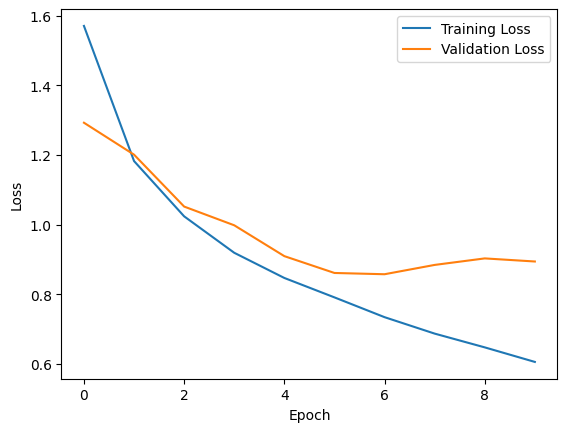

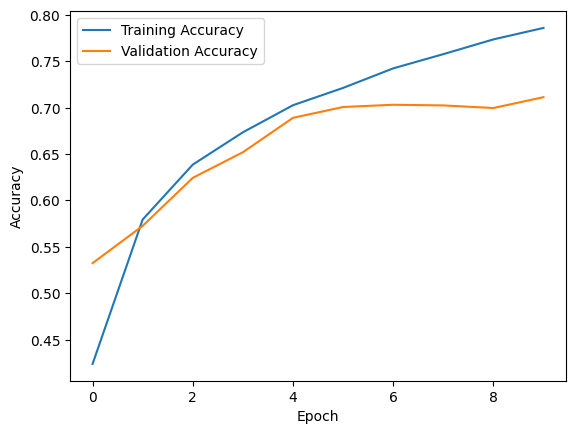

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import pickle

# Fungsi untuk memuat data dari file CIFAR-10
def load_cifar_batch(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Memuat data pelatihan
train_data = []
train_labels = []
for i in range(1, 6):
    batch = load_cifar_batch(f"data_batch_{i}")
    train_data.append(batch[b'data'])
    train_labels.extend(batch[b'labels'])

train_data = np.concatenate(train_data, axis=0)
train_data = train_data.reshape((len(train_data), 3, 32, 32)).transpose(0, 2, 3, 1)
train_labels = np.array(train_labels)

# Memuat data pengujian
test_batch = load_cifar_batch("test_batch")
test_data = test_batch[b'data']
test_labels = np.array(test_batch[b'labels'])

test_data = test_data.reshape((len(test_data), 3, 32, 32)).transpose(0, 2, 3, 1)

# Normalisasi data
train_data = train_data / 255.0
test_data = test_data / 255.0

# Definisi model CNN
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Membuat model
input_shape = (32, 32, 3)
num_classes = 10
model = create_cnn_model(input_shape, num_classes)

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Latih model
history = model.fit(train_data, train_labels, epochs=10, validation_split=0.2)

# Evaluasi model
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
